<a href="https://colab.research.google.com/github/sqr8ap/assignment3/blob/main/assignment_knn_and_kmc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment 3: $k$ Nearest Neighbor and $k$ Means Clustering

## **Do three questions.**

`! git clone https://www.github.com/DS3001/knn`

In [1]:
! git clone https://www.github.com/DS3001/knn

Cloning into 'knn'...
remote: Enumerating objects: 16, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 16 (delta 2), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (16/16), 7.28 MiB | 9.85 MiB/s, done.
Resolving deltas: 100% (2/2), done.


In [2]:
import os

os.chdir('/content/knn/data')
os.getcwd()

'/content/knn/data'

**Q1.** This question is a case study for $k$ nearest neighbor. The target variable `y` is `Purchase` and the features of interest are `Age` and `AnnualSalary`.

1. Load the `./data/car_data.csv` data. Look at the head and dimensions of the data.
2. Summarize the variables (`User.ID`, `Gender`, `Age`, `AnnualSalary`, `Purchase`). Are there any missings to clean? Convert the `Gender` categorical variable into a dummy variable that takes the value 0 for male and 1 for female. Create a matrix $X$ of predictors including `Age` and `AnnualSalary`, and an outcome $y$ equaling `Purchase`.
3. MaxMin-normalize `Age` and `AnnualSalary` in `X`.
4. Split the sample into a ~80% training dataset and a ~20% testing dataset.
5. Treat this as a classification problem: The model is supposed to predict 0 or 1 for each customer, classifying them as a purchaser or non-purchaser. Use sklearn to determine the optimal number of neighbors $k$ to use.
6. Run the model for the optimal number of neighbors on the testing data. Cross tabulate the predicted outcomes against the actual outcomes; this is called a **confusion matrix**. How often does the model predict a sale when one fails to occur? How often does the model predict no sale when one does occur? Overall, does it provide accurate predictions?
7. Now, compute confusion matrices separately for men and women, as in part 6. Does the model make more accurate predictions for one sex or the other? Explain. (Performance of algorithms on population subgroups is a growing topic in data science.)

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 1.

In [27]:
df = pd.read_csv('car_data.csv')

In [28]:
df.head()

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0


In [29]:
print(df.info())
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User ID       1000 non-null   int64 
 1   Gender        1000 non-null   object
 2   Age           1000 non-null   int64 
 3   AnnualSalary  1000 non-null   int64 
 4   Purchased     1000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 39.2+ KB
None
(1000, 5)


## 2.

In [30]:
print(df['Gender'].unique())
print(df.describe())
# no NAs

df.loc[df['Gender'] == 'Male', 'Gender'] = 0
df.loc[df['Gender'] == 'Female', 'Gender'] = 1
df['Gender'].value_counts()

['Male' 'Female']
           User ID          Age   AnnualSalary    Purchased
count  1000.000000  1000.000000    1000.000000  1000.000000
mean    500.500000    40.106000   72689.000000     0.402000
std     288.819436    10.707073   34488.341867     0.490547
min       1.000000    18.000000   15000.000000     0.000000
25%     250.750000    32.000000   46375.000000     0.000000
50%     500.500000    40.000000   72000.000000     0.000000
75%     750.250000    48.000000   90000.000000     1.000000
max    1000.000000    63.000000  152500.000000     1.000000


1    516
0    484
Name: Gender, dtype: int64

In [31]:
# matrix with Age, AnnualSalary and Purchased

X = df.loc[:,['Age','AnnualSalary']]
y = df[['Purchased']]
print(X.head(),'\n')
print(y.head())

   Age  AnnualSalary
0   35         20000
1   40         43500
2   49         74000
3   40        107500
4   25         79000 

   Purchased
0          0
1          0
2          0
3          1
4          0


## 3.

In [32]:
# Maxmin normalization function:
def maxmin(n):
    n = (n-min(n))/(max(n)-min(n))
    return(n)

# Apply maxmin to each column of X:
X = X.apply(maxmin)
X.describe()

,Age,AnnualSalary
count,1000.000000,1000.000000
mean,0.491244,0.419556
std,0.237935,0.250824
min,0.000000,0.000000
25%,0.311111,0.228182
50%,0.488889,0.414545
75%,0.666667,0.545455
max,1.000000,1.000000


## 4.

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=10)

In [34]:
# showing that it's 80/20
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

800
200
800
200


## 5.

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

The optimal k is [11].


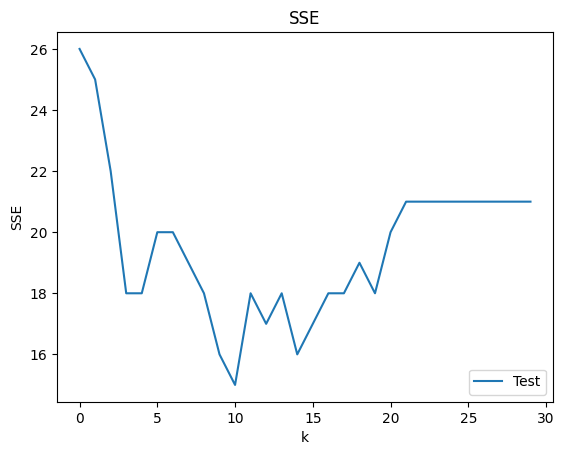

In [35]:
from sklearn.neighbors import KNeighborsRegressor as kNNRegression
from sklearn.neighbors import KNeighborsClassifier

k_bar = 30
k_grid = np.arange(1,k_bar) # The range of k's to consider
SSE = np.zeros(k_bar) # Object to save the Sum of Squared Error
for k in range(k_bar):
  model = KNeighborsClassifier(n_neighbors=k+1) # Create a sk model for k
  fitted_model = model.fit(X_train,y_train) # Train the model on our data
  y_hat = fitted_model.predict(X_test) # Predict values for test set
  SSE[k] = np.sum( ((np.asarray(y_test).reshape(len(y_hat)))-y_hat)**2 ) # I had to reshape the y_test array to get it to run
  #SSE[k] = np.sum( (y_test - (np.asarray(y_test).reshape(len(y_test))) )**2   )

SSE_min = np.min(SSE) # Lowest recorded SSE
min_index = np.where(SSE==SSE_min) # Find the indices of y that equal the minimum
k_star = k_grid[min_index] # Find the optimal value of k
print(f"The optimal k is {k_star}.")

plt.plot(np.arange(0,k_bar),SSE,label='Test') # Plot SSE by k
plt.xlabel("k")
plt.ylabel("SSE")
plt.legend(loc='lower right')
plt.title('SSE')
plt.show()




The optimal k here is 11.

## 6.

In [36]:
model = KNeighborsClassifier(n_neighbors=11) # Create a sk model for k
fitted_model = model.fit(X_train,y_train) # Train the model on our data
y_hat = fitted_model.predict(X_test) # Predict values for test set

pd.crosstab(np.asarray(y_test).reshape(len(y_hat)), y_hat) # again, reshaped y_test to match y_hat

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


col_0,0,1
row_0,,
0,117,9
1,6,68


As shown in the confusion matrix, most cases are predicted correctly; 185 cases are correct, specifically. There are 9 cases in which a 0 is classified as a 1, and there are 6 cases in which a 1 is classified as a 0. The proportion of cases that are accurately predicted is 0.925. The proportion of cases that are inaccurately predicted is 0.075.

## 7.

In [52]:
from sklearn.model_selection import train_test_split
vars = ['Age','AnnualSalary','Gender']
X = df.loc[:,vars]
y = df['Purchased']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=10)

# Use the selected k to train the model, not using the gender variable:
model = KNeighborsClassifier(n_neighbors=11) # Create a sk model for k
fitted_model = model.fit(X_train.drop('Gender',axis=1),y_train) # Train the model
y_hat = fitted_model.predict(X_test.drop('Gender',axis=1)) # Predict values

# Break out the true/predicted values by recorded sex:
y_hat_M = y_hat[ X_test['Gender'] == 0]
y_hat_F = y_hat[ X_test['Gender'] == 1]
y_M = y_test[ X_test['Gender'] == 0]
y_F = y_test[ X_test['Gender'] == 1]

In [53]:
pd.crosstab(y_F, y_hat_F)

col_0,0,1
Purchased,,
0,44,14
1,9,30


In [54]:
pd.crosstab(y_M, y_hat_M)

col_0,0,1
Purchased,,
0,56,12
1,11,24


The model predicted females' purchases accurately 76.29% of the time, whereas it predicted males' purchases accurately 77.67% of the time. This is a difference of a little over 1%, with males' purchases being predicted accurately more often. I think a 1% difference in this context may not be particularly alarming.

**Q2.** This question is a case study for $k$ nearest neighbor The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for evaluation.
4. Use the $k$NN algorithm for regression and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the Sum of Squared Error and make a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?
5. Determine the optimal $k$ for these data.
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

## 1.

In [56]:
df = pd.read_csv("USA_cars_datasets.csv")
df = df[['price','year','mileage']]
print(df.head())
print('\n')
print(df.shape)
print('\n')
print(df.info())

   price  year  mileage
0   6300  2008   274117
1   2899  2011   190552
2   5350  2018    39590
3  25000  2014    64146
4  27700  2018     6654


(2499, 3)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2499 entries, 0 to 2498
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   price    2499 non-null   int64
 1   year     2499 non-null   int64
 2   mileage  2499 non-null   int64
dtypes: int64(3)
memory usage: 58.7 KB
None


In [57]:
price_na = df['price'].isna()
print(sum(item == True for item in price_na))
year_na = df['year'].isna()
print(sum(item == True for item in year_na))
mileage_na = df['mileage'].isna()
print(sum(item == True for item in mileage_na))

0
0
0


No NAs

## 2.

In [94]:
# maxmin normalize year and mileage

X = df.loc[:,['year','mileage']]
y = df['price']

def maxmin(n):
    n = (n-min(n))/(max(n)-min(n))
    return(n)

X = X.apply(maxmin)
print(X)

          year   mileage
0     0.744681  0.269287
1     0.808511  0.187194
2     0.957447  0.038892
3     0.872340  0.063016
4     0.957447  0.006537
...        ...       ...
2494  0.978723  0.023193
2495  0.957447  0.033944
2496  0.957447  0.031037
2497  0.957447  0.031983
2498  0.957447  0.030818

[2499 rows x 2 columns]


## 3.

In [95]:
# split sample 80/20

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=100)

## 4.

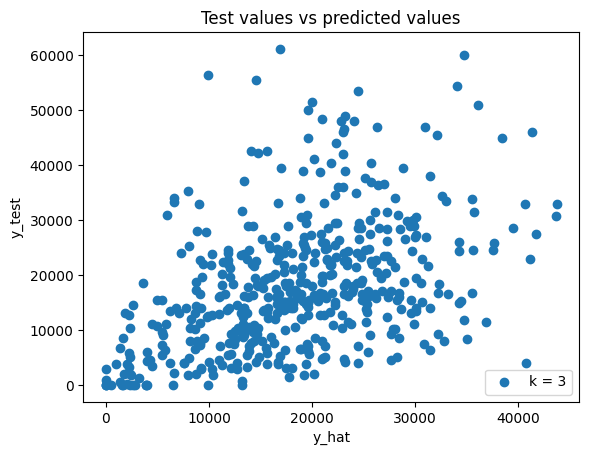

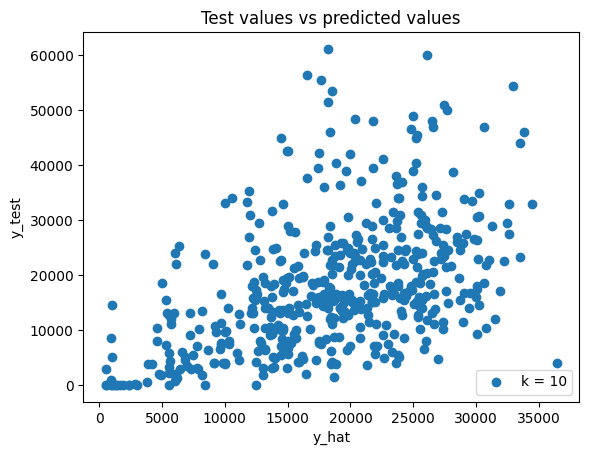

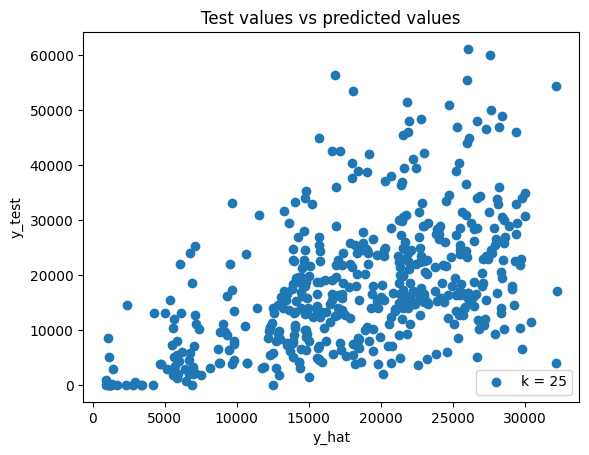

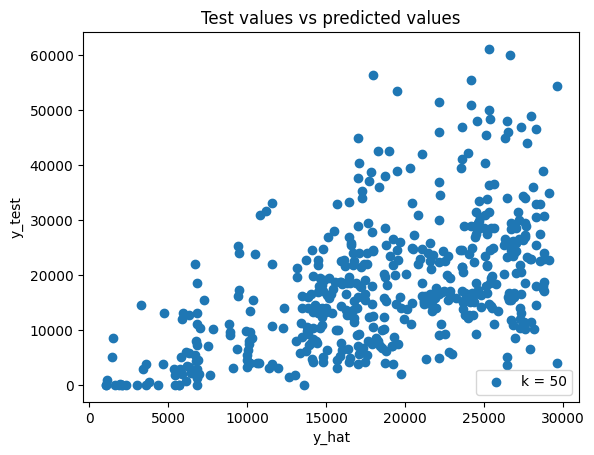

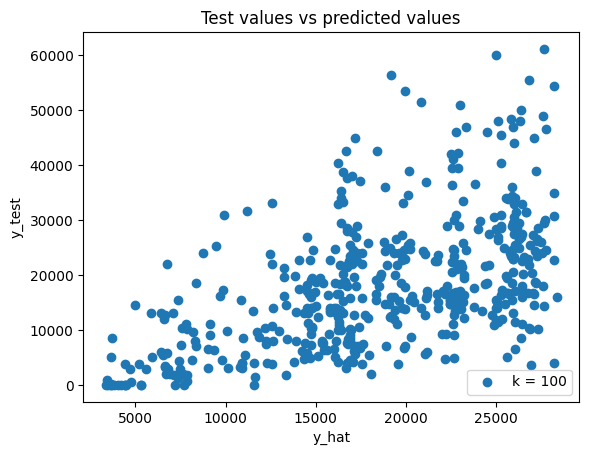

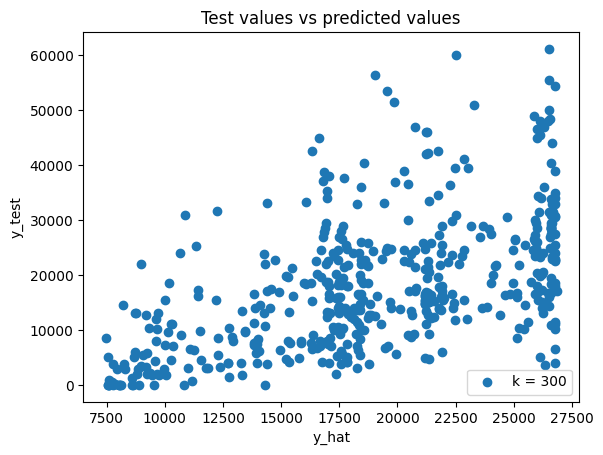

In [133]:
from sklearn.neighbors import KNeighborsRegressor

k_vals = [3,10,25,50,100,300]
y_hats = []
SSE = np.zeros(len(k_vals))
count = 0 # to use as index for SSE[]; will increase by 1 at end of each iteration of loop

# loop through k values and append each array of predictions to a list, add SSE to array, and make a plot
for k in k_vals:
  model = KNeighborsRegressor(n_neighbors=k)
  regressor_model = model.fit(X_train,y_train)
  y_hat = regressor_model.predict(X_test)
  y_hats.append(y_hat)
  SSE[count] = np.sum( (y_test-y_hat)**2 )
  count += 1

  # make plot:
  plt.scatter(y_hat,y_test,label=f"k = {k}")
  plt.xlabel("y_hat")
  plt.ylabel("y_test")
  plt.legend(loc='lower right')
  plt.title('Test values vs predicted values')
  plt.show()




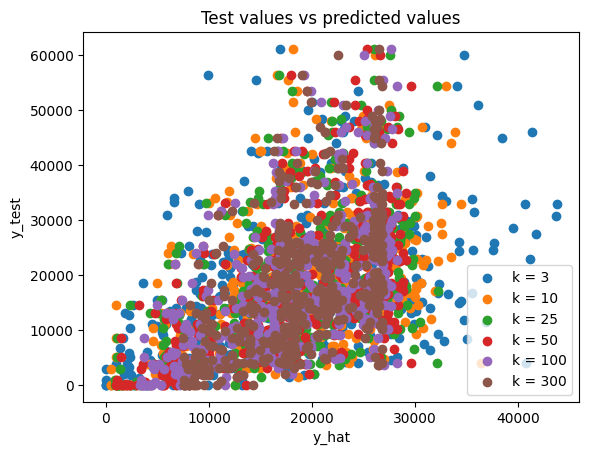

In [134]:
# Can also put all plots together to more easily compare without rescaling the above plots:

# do this by showing plot after loop rather than having plt.show() within the loop
from sklearn.neighbors import KNeighborsRegressor

k_vals = [3,10,25,50,100,300]
y_hats = []
SSE = np.zeros(len(k_vals))
count = 0 # to use as index for SSE[]; will increase by 1 at end of each iteration of loop

# loop through k values and append each array of predictions to a list, add SSE to array, and make a plot
for k in k_vals:
  model = KNeighborsRegressor(n_neighbors=k)
  regressor_model = model.fit(X_train,y_train)
  y_hat = regressor_model.predict(X_test)
  y_hats.append(y_hat)
  SSE[count] = np.sum( (y_test-y_hat)**2 )
  count += 1

  # make plot:
  plt.scatter(y_hat,y_test,label=f"k = {k}")
  plt.xlabel("y_hat")
  plt.ylabel("y_test")
  plt.legend(loc='lower right')
  plt.title('Test values vs predicted values')

plt.show()

As we increase k, it seems like the range of predicted values gets narrower. With k=3, there are y_hat values far outside the range of the y_hats for k=300.

## 5.

In [130]:
print(SSE)
SSE_min = np.min(SSE)
min_index = np.where(SSE == SSE_min)
min_index

[6.32232866e+10 5.54010928e+10 5.15852289e+10 4.98477220e+10
 4.91355295e+10 5.02386495e+10]


(array([4]),)

The lowest SSE is at index 4; this corresponds to a k of 100, as 100 is found at index 4 in k_vals. The optimal k here is 100.

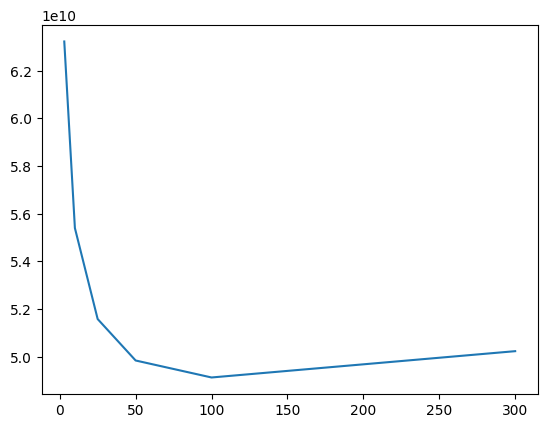

In [132]:
# this conclusion is also supported by the following plot of SSEs plotted against k values.
# SSE is lowest, though still high, at k = 100

plt.plot(k_vals,SSE)
plt.show()

## 6.

With values of k that are too low, the model overfits the data, whereas with values of k that are too high, the model underfits the data. This is visible in the plot with all 6 models; the predictions with a k of 300 take on a smaller range of values, as each prediction takes 300 neighbors into account. In contrast, the predictions with a k of 3 are too closely fit to the data they were trained on, as each prediction only takes the 3 closest neighbors into account; thus, as shown in the plot, these predictions span a much wider range of values than the predictions using more neighbors.

**Q3.** This question is a case study for $k$ nearest neighbor, particularly variable selection. The data for the question include (summaries reproduced here directly from the codebook):

- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- death event: if the patient deceased during the follow-up period (boolean)

1. Load the `./data/heart_failure_clinical_records_dataset.csv`. Are there any `NA`'s to handle? use `.drop()` to remove `time` from the dataframe.
2. Make a correlation matrix. What variables are strongly associated with a death event?
3. For the dummy variables `anaemia`, `diabetes`, `high_blood_pressure`, `sex`, and `smoking`, compute a summary table of `DEATH_EVENT` grouped by the variable. For which variables does a higher proportion of the population die when the variable takes the value 1 rather than 0?
4. On the basis of your answers from 2 and 3, build a matrix $X$ of the variables you think are most predictive of a death, and a variable $y$ equal to `DEATH_EVENT`.
5. Maxmin normalize all of the variables in `X`.
6. Split the sample into ~80% for training and ~20% for evaluation. (Try to use the same train/test split for the whole question, so that you're comparing apples to apples in the questions below.).
7. Determine the optimal number of neighbors for a $k$NN regression for the variables you selected.
8. OK, do steps 5 through 7 again, but use all of the variables (except `time`). Which model has a lower Sum of Squared Error? Which would you prefer to use in practice, if you had to predict `DEATH_EVENT`s? If you play with the selection of variables, how much does the SSE change for your fitted model on the test data? Are more variables better, in this case? Explain your findings.

**Q4.** Let's do some very basic computer vision. We're going to import the MNIST handwritten digits data and $k$NN to predict values (i.e. "see/read").

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use the reshaped `X_test` and `y_test` data to create a $k$-nearest neighbor classifier of digit. What is the optimal number of neighbors $k$? If you can't determine this, play around with different values of $k$ for your classifier.
5. For the optimal number of neighbors, how well does your predictor perform on the test set?
6. So, this is how computers "see." They convert an image into a matrix of values, that matrix becomes a vector in a dataset, and then we deploy ML tools on it as if it was any other kind of tabular data. To make sure you follow this, invent a way to represent a color photo in matrix form, and then describe how you could convert it into tabular data. (Hint: RGB color codes provide a method of encoding a numeric value that represents a color.)

**Q5.** This question is a case study for $k$ means clustering.

1. Load the `airbnb_hw.csv` data. Clean `Price` along with `Beds`, `Number of Reviews`, and `Review Scores Rating`.
2. Maxmin normalize the data and remove any `nan`'s (`KMeans` from `sklearn` doesn't accept `nan` input).
3. Use `sklearn`'s `KMeans` module to cluster the data by `Beds`, `Number of Reviews`, and `Review Scores Rating` for `k=6`.
4. Use `seaborn`'s `.pairplot()` to make a grid of scatterplots that show how the clustering is carried out in multiple dimensions.
5. Use `.groupby` and `.describe` to compute the average price for each cluster. Which clusters have the highest rental prices?
6. Use a scree plot to pick the number of clusters and repeat steps 4 and 5.

**Q6.** This is a question about $k$ means clustering. We want to investigate how adjusting the "noisiness" of the data impacts the quality of the algorithm and the difficulty of picking $k$.

1. Run the code below, which creates four datasets: `df0_125`, `df0_25`, `df0_5`, `df1_0`, and `df2_0`. Each data set is created by increasing the amount of `noise` (standard deviation) around the cluster centers, from `0.125` to `0.25` to `0.5` to `1.0` to `2.0`.

```
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,1,N),np.random.normal(1,1,N)])
    X2 = np.array([np.random.normal(3,1,N),np.random.normal(2,1,N)])
    X3 = np.array([np.random.normal(5,1,N),np.random.normal(3,1,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)
```

2. Make scatterplots of the $(X1,X2)$ points by group for each of the datasets. As the `noise` goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?
3. Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$.
4. Explain the intuition of the elbow, using this numerical simulation as an example.

## 1.

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)

## 2.

<Axes: xlabel='x1', ylabel='x2'>

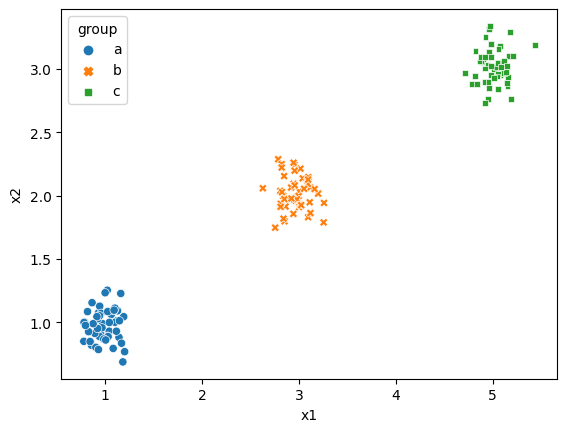

In [13]:
sns.scatterplot(data = df0_125, x = 'x1',y='x2',hue='group',style='group')

<Axes: xlabel='x1', ylabel='x2'>

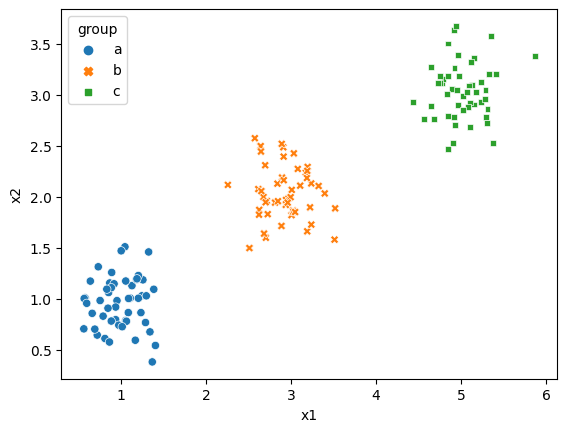

In [14]:
sns.scatterplot(data = df0_25, x = 'x1',y='x2',hue='group',style='group')

<Axes: xlabel='x1', ylabel='x2'>

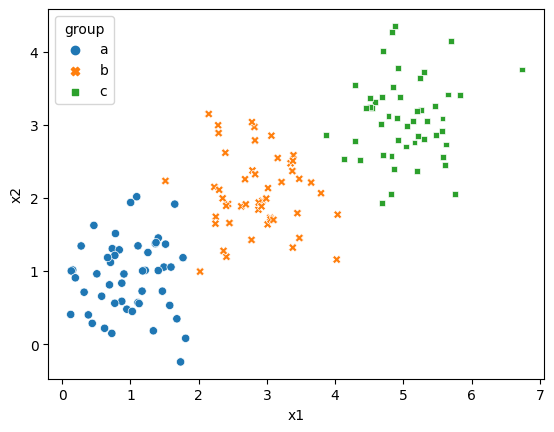

In [15]:
sns.scatterplot(data = df0_5, x = 'x1',y='x2',hue='group',style='group')

<Axes: xlabel='x1', ylabel='x2'>

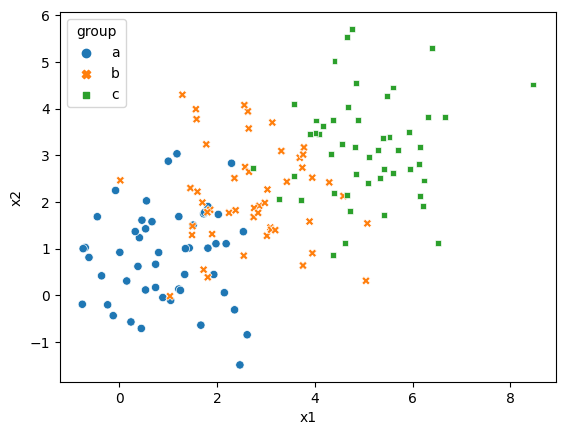

In [16]:
sns.scatterplot(data = df1_0, x = 'x1',y='x2',hue='group',style='group')

<Axes: xlabel='x1', ylabel='x2'>

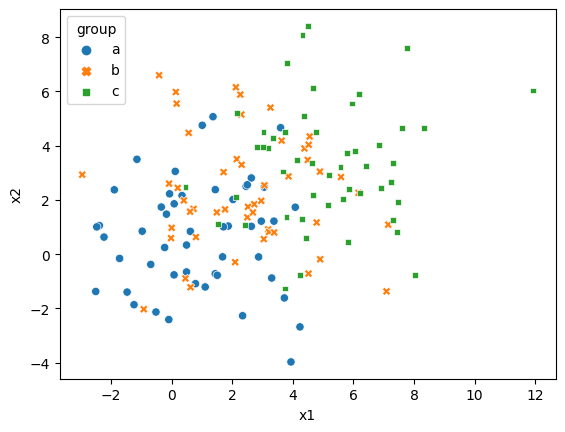

In [17]:
sns.scatterplot(data = df2_0, x = 'x1',y='x2',hue='group',style='group')

As the noise increases, the clusters become less distinct. When noise = 0.125, the clusters are very distinct and notably far apart. When noise = 2.0, the clusters are indistinguishable. The threshold appears to be around noise = 0.5, as at this point they start to converge.

## 3.

(0.0, 35.0)

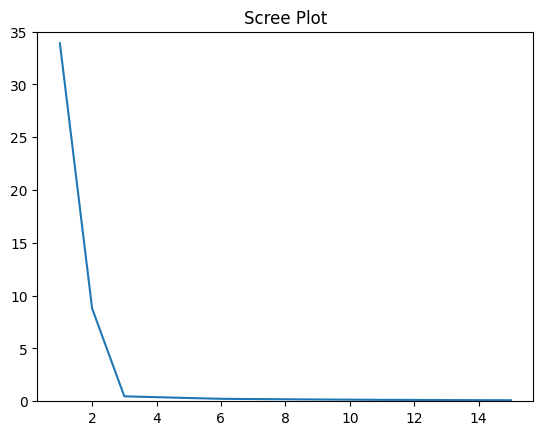

In [29]:
from sklearn.cluster import KMeans

def maxmin(n):
    n = (n-min(n))/(max(n)-min(n))
    return n

# scree plot for 0.125
X = df0_125.loc[:,['x1','x2']]
X = X.apply(maxmin)
k_bar = 15
k_grid = np.arange(1,k_bar+1)
SSE = np.zeros(k_bar)
for k in range(k_bar):
  model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0)
  model = model.fit(X) # Fit the model
  SSE[k] = model.inertia_
scree_plot, axes = plt.subplots()
sns.lineplot(x=k_grid, y=SSE).set_title('Scree Plot')
axes.set_ylim(0,35)


(0.0, 35.0)

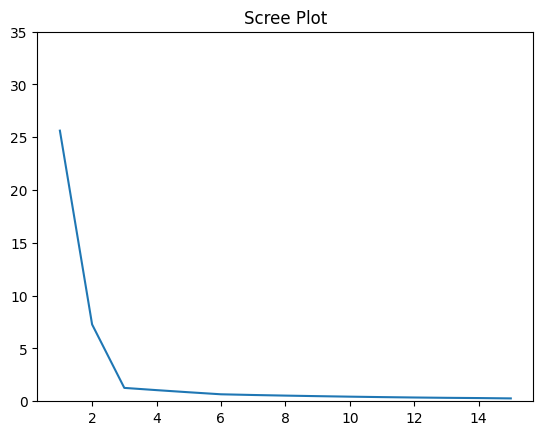

In [30]:
# scree plot for 0.25
X = df0_25.loc[:,['x1','x2']]
X = X.apply(maxmin)
k_bar = 15
k_grid = np.arange(1,k_bar+1)
SSE = np.zeros(k_bar)
for k in range(k_bar):
  model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0)
  model = model.fit(X) # Fit the model
  SSE[k] = model.inertia_
scree_plot, axes = plt.subplots()
sns.lineplot(x=k_grid, y=SSE).set_title('Scree Plot')
axes.set_ylim(0,35)

(0.0, 35.0)

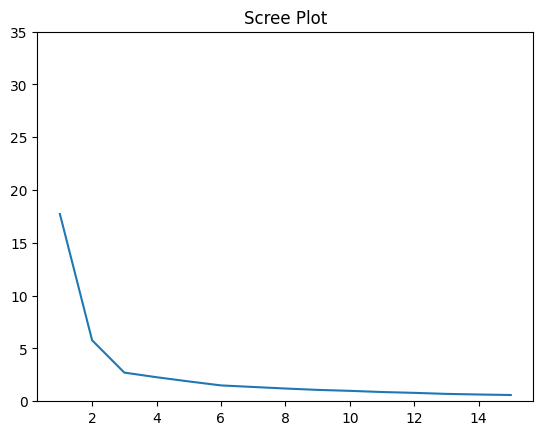

In [31]:
# scree plot for 0.5
X = df0_5.loc[:,['x1','x2']]
X = X.apply(maxmin)
k_bar = 15
k_grid = np.arange(1,k_bar+1)
SSE = np.zeros(k_bar)
for k in range(k_bar):
  model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0)
  model = model.fit(X) # Fit the model
  SSE[k] = model.inertia_
scree_plot, axes = plt.subplots()
sns.lineplot(x=k_grid, y=SSE).set_title('Scree Plot')
axes.set_ylim(0,35)

(0.0, 35.0)

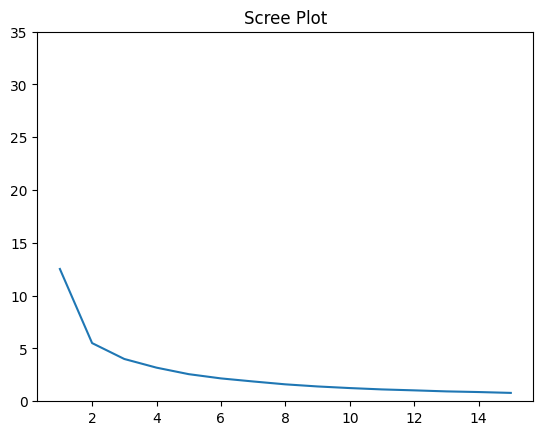

In [32]:
# scree plot for 1.0
X = df1_0.loc[:,['x1','x2']]
X = X.apply(maxmin)
k_bar = 15
k_grid = np.arange(1,k_bar+1)
SSE = np.zeros(k_bar)
for k in range(k_bar):
  model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0)
  model = model.fit(X) # Fit the model
  SSE[k] = model.inertia_
scree_plot, axes = plt.subplots()
sns.lineplot(x=k_grid, y=SSE).set_title('Scree Plot')
axes.set_ylim(0,35)

(0.0, 35.0)

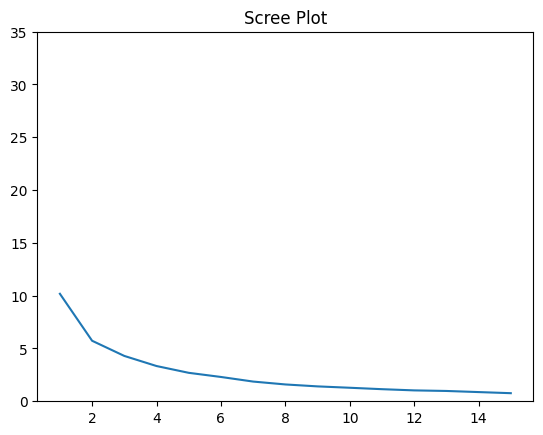

In [33]:
# scree plot for 2.0
X = df2_0.loc[:,['x1','x2']]
X = X.apply(maxmin)
k_bar = 15
k_grid = np.arange(1,k_bar+1)
SSE = np.zeros(k_bar)
for k in range(k_bar):
  model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0)
  model = model.fit(X) # Fit the model
  SSE[k] = model.inertia_
scree_plot, axes = plt.subplots()
sns.lineplot(x=k_grid, y=SSE).set_title('Scree Plot')
axes.set_ylim(0,35)

As noise increases, it becomes harder to identify clear elbows and pick an optimal k. When noise = 0.125, there is a very clear elbow at k=3. When noise = 0.25, there is also a clear elbow at k=3. This elbow is still visible when noise = 0.5 but is less pronounced. When noise = 1.0, it looks like there may be an elbow at k=2, but it is less obvious, and when noise = 2.0, it is hard to tell if there is an elbow at all. Thus, with less noise, it is easier to confidently select a k.

## 4.

On a scree plot, the "elbow" is the point at which one additional k significantly reduces the SSE; in the scree plots with low noise, there is a very obvious drop in SSE at a specific k, and this point would be considered an elbow. The scree plots with more noise have less obvious elbows, as the clusters themselves are more or less indistinct. Indistinct clusters that look more like a cloud of points will have smoother scree plots that lack obvious elbows.

**Q7.** We looked at computer vision with $k$NN in a previous question. Can $k$ means clustering correctly group digits, even if we don't know which symbols are which?

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use $k$ means clustering on the reshaped `X_test` data with `k=10`.  
5. Cross tabulate the cluster assignments with the true labels for the test set values. How good is the correspondence? What proportion of digits are clustered correctly? Which digits are the hardest to distinguish from one another? Can $k$MC recover the latent digits 0 to 9, without even knowing what those digits were?
6. If you use a scree plot to determine the number of clusters $k$, does it pick 10 (the true number of digits), or not? If it fails to pick $k=10$, which digits does it tend to combine into the same classification?